# WGAN-GP Training

## imports

In [1]:
import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle


Using TensorFlow backend.


In [3]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeb'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [4]:
BATCH_SIZE = 512
IMAGE_SIZE = 64

In [5]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 202599 images belonging to 1 classes.


In [6]:
x_train[0][0][0]

array([[[-0.9843137 , -0.9843137 , -0.9843137 ],
        [-0.9843137 , -0.9843137 , -0.9843137 ],
        [-0.9843137 , -0.9843137 , -0.9843137 ],
        ...,
        [-0.99215686, -0.9764706 , -0.9843137 ],
        [-0.99215686, -0.9764706 , -0.9843137 ],
        [-1.        , -0.9843137 , -0.99215686]],

       [[-0.9843137 , -0.9843137 , -0.9843137 ],
        [-0.9843137 , -0.9843137 , -0.9843137 ],
        [-0.9843137 , -0.9843137 , -0.9843137 ],
        ...,
        [-0.99215686, -0.9764706 , -0.9843137 ],
        [-0.99215686, -0.9764706 , -0.9843137 ],
        [-1.        , -0.9843137 , -0.99215686]],

       [[-0.9843137 , -0.9843137 , -0.9843137 ],
        [-0.9843137 , -0.9843137 , -0.9843137 ],
        [-0.9843137 , -0.9843137 , -0.9843137 ],
        ...,
        [-0.99215686, -0.9764706 , -0.9843137 ],
        [-0.99215686, -0.9764706 , -0.9843137 ],
        [-0.99215686, -0.9764706 , -0.9843137 ]],

       ...,

       [[ 0.08235294,  0.22352941,  0.38039216],
        [ 0

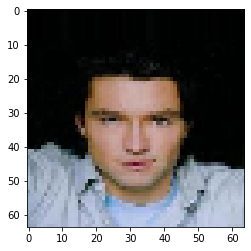

In [7]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [8]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))




In [9]:
gan.critic.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 64, 64, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 8, 8, 256)         819456    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 8, 8, 256)         0   

In [10]:
gan.generator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024

## training

In [11]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 50
N_CRITIC = 5
BATCH_SIZE = 512

In [12]:
gan.train(
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

/home/cataluna84/anaconda3/envs/tf-gpu-1/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/home/cataluna84/anaconda3/envs/tf-gpu-1/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 (5, 1) [D loss: (0.4)(R -5.0, F -0.1, G 0.6)] [G loss: 0.2]


/home/cataluna84/anaconda3/envs/tf-gpu-1/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 (5, 1) [D loss: (-80.2)(R -121.3, F 15.3, G 2.6)] [G loss: -20.6]
2 (5, 1) [D loss: (-113.9)(R -203.4, F 20.8, G 6.9)] [G loss: -18.0]
3 (5, 1) [D loss: (-117.4)(R -190.5, F 16.4, G 5.7)] [G loss: -17.4]
4 (5, 1) [D loss: (-122.0)(R -195.3, F 8.9, G 6.4)] [G loss: -16.7]
5 (5, 1) [D loss: (-120.6)(R -215.6, F 19.0, G 7.6)] [G loss: -7.9]
6 (5, 1) [D loss: (-121.8)(R -193.9, F 13.4, G 5.9)] [G loss: -23.5]
7 (5, 1) [D loss: (-116.8)(R -200.2, F 22.9, G 6.0)] [G loss: -25.9]
8 (5, 1) [D loss: (-115.2)(R -217.5, F 29.1, G 7.3)] [G loss: -20.7]
9 (5, 1) [D loss: (-113.5)(R -209.0, F 25.3, G 7.0)] [G loss: -24.2]
10 (5, 1) [D loss: (-110.9)(R -228.6, F 34.1, G 8.4)] [G loss: -0.3]
11 (5, 1) [D loss: (-119.7)(R -193.6, F 14.4, G 5.9)] [G loss: -25.5]
12 (5, 1) [D loss: (-115.8)(R -223.0, F 31.1, G 7.6)] [G loss: -2.6]
13 (5, 1) [D loss: (-116.5)(R -207.0, F 23.7, G 6.7)] [G loss: -11.5]
14 (5, 1) [D loss: (-112.1)(R -238.6, F 42.8, G 8.4)] [G loss: 17.6]
15 (5, 1) [D loss: (-113.9)(R -226.

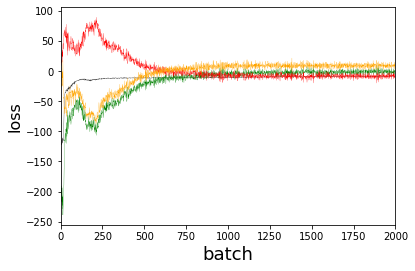

In [13]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()

fig.savefig(os.path.join(RUN_FOLDER, "WGAN_GP_loss_vs_batch.png"), dpi=1000)
